In [1]:
### 2.   Load and Explore Dataset

## **[2.1]** Import the pandas and numpy packages

import pandas as pd
import numpy as np

In [3]:
# **[2.4]** Create a variable called `file_url` containing th url to the raw dataset

file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

# **[2.5]** Load the data in a dataframe called `df`
df = pd.read_csv(file_url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# **[2.7]** Display the dimensions (shape) of df
df.shape

(200, 5)

In [5]:
# **[2.8]** Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# **[2.9]** Display the descriptive statistics of df
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# **[2.10]** Save the dataframe locally in the `data/raw` folder
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [8]:
# **[3.1]** Create a copy of `df` and save it into a variable called `df_cleaned`
df_cleaned = df.copy()

In [9]:
# **[3.2]** Drop the column `CustomerID` from the dataframe and save it into the `data/interim` folder
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [10]:
# **[3.3]** Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# **[3.4]** Split the data into training and testing sets with 80-20 ratio
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [11]:
# **[3.5]** Create a copy of `X_train` and save it into a variable called `X_train_cleaned`
X_train_cleaned = X_train.copy()

In [12]:
# **[3.6]** Import `StandardScaler` and `OneHotEncoder` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **[3.7]** Create a list called `num_cols` that contains `Age`, `Annual Income (k$)` and `Spending Score (1-100)`
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# **[3.8]** Instantiate a `StandardScaler` and called it `sc`
sc = StandardScaler()

# **[3.9]** Fit and transform the numeric feature of `X_train_cleaned` and replace the data into it
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [16]:
# **[3.10]** Create a list called `cat_cols` that contains `Gender`
cat_cols = ['Gender']

# **[3.11]** Instantiate a `OneHotEncoder` with `sparse=False` and `drop='first'` and save it to a variable called `ohe`
ohe = OneHotEncoder(sparse=False, drop='first')
print(ohe)

# **[3.12]** Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])
print('X_train_cleaned', X_train_cleaned)

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)
X_train_cleaned      Gender       Age  Annual Income (k$)  Spending Score (1-100)
40      0.0  1.771416           -0.844380               -0.585705
4       0.0 -0.583546           -1.674190               -0.388498
196     0.0  0.386144            2.632916               -0.861795
111     0.0 -1.414709            0.143488                0.163682
141     1.0 -0.514282            0.617665                1.701898
..      ...       ...                 ...                     ...
136     0.0  0.316881            0.538635               -1.690066
133     0.0 -0.583546            0.499120                0.834186
105     0.0 -1.276181            0.103973               -0.309615
84      0.0 -1.276181           -0.212145                0.282006
195     0.0 -0.306491            2.395827                1.149718

[160 rows x 4 columns]


In [17]:
# **[3.13]** Reset the indexes of `X_train_cleaned`
X_train_cleaned.reset_index(drop=True, inplace=True)
print(X_train_cleaned)

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       0.0  1.771416           -0.844380               -0.585705
1       0.0 -0.583546           -1.674190               -0.388498
2       0.0  0.386144            2.632916               -0.861795
3       0.0 -1.414709            0.143488                0.163682
4       1.0 -0.514282            0.617665                1.701898
..      ...       ...                 ...                     ...
155     0.0  0.316881            0.538635               -1.690066
156     0.0 -0.583546            0.499120                0.834186
157     0.0 -1.276181            0.103973               -0.309615
158     0.0 -1.276181           -0.212145                0.282006
159     0.0 -0.306491            2.395827                1.149718

[160 rows x 4 columns]


In [18]:
### 4. Gaussian Mixture Model

# **[4.1]** Import `KElbowVisualizer` from `yellowbrick.cluster`
#                  `KMeans` from `sklearn.cluster`
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fd3898490>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=14,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

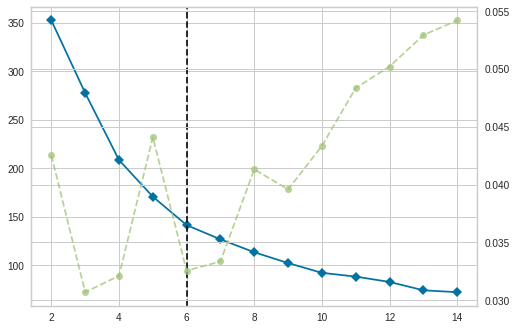

In [19]:
# **[4.2]** Instantiate a `KElbowVisualizer` with an instantied KMeans and k=(2, 15) and save it into a variable called `model`
model = KElbowVisualizer(KMeans(), k=(2,15))

# **[4.3]** Fit `model` with `X_train_cleaned`
model.fit(X_train_cleaned)

In [20]:
# **[4.4]** Save the attribute `elbow_value_` from `model` and save it to a variable called `n_clusters`
n_clusters = model.elbow_value_
n_clusters

6

In [24]:
# **[4.5]** Import `GaussianMixture` from `sklearn.mixture`
from sklearn.mixture import GaussianMixture

# **[4.6]** Instantiate a `GaussianMixture` with `n_components` and `random_state` set and save it into a variable called `gmm`
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

# **[4.7]** Fit `gmm` with `X_train_cleaned`
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
# **[4.8]** Make predictions on `X_train_cleaned`
gmm.predict(X_train_cleaned)


array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [27]:
# **[4.9]** Transform the first observation of `X_train_cleaned` into a dataframe and call it `obs` 
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

# **[4.10]** Make prediction on `obs`
gmm.predict(obs)

array([2])

### 5. Build Pipeline

In [28]:
#  **[5.1]** Import `Pipeline` from `sklearn.pipeline`
from sklearn.pipeline import Pipeline

# **[5.2]** Create a `Pipeline` called `num_transformer` with one step that contains `StandardScaler`
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

# **[5.3]** Create a `Pipeline` called `cat_transformer` with one step that contains `OneHotEncoder`
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [29]:
# **[5.4]** Import `ColumnTransformer` from `sklearn.compose`
from sklearn.compose import ColumnTransformer

# **[5.5]** Create a `ColumnTransformer` called `preprocessor` with 2 steps containing `num_transformer` and `cat_transformer` 
# that will be applied respectively to `num_cols` and `cat_cols`
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

In [30]:
# **[5.6]** Create a `Pipeline` called `gm_pipe` that contains 2 steps `preprocessor` and another that instantiate a GaussianMixture with same parameters as previously
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [31]:
# **[5.7]** Fit `gmm_pipe` with `X_train`
gmm_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_cols',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                         

In [32]:
# **[5.8]** Make predictions on X_train
gmm_pipe.predict(X_train)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [33]:
# **[5.9]** Transform the first observation of `X_train` into a dataframe, call it `obs` and make prediction on it
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

In [34]:
# **[5.10]** Import `dump` from `joblib` package and save `gmm_pipe` into `models` folder
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')


['../models/gmm_pipeline.joblib']

### 6.   Push changes

In [ ]:
# **[6.1]** Add you changes to git staging area
git add . 

# **[6.2]** Create the snapshot of your repository and add a description
git commit -m "gmm pipeline"

# **[6.3]** Push your snapshot to Github
git push https://**********@github.com/CazMayhem/adv_dsi_lab_4a.git

In [ ]:
# **[6.4]** Check out to the master branch
git checkout master

# **[6.5]** Pull the latest updates
git pull https://**********@github.com/CazMayhem/adv_dsi_lab_4a.git

In [ ]:
# **[6.6]** Check out to the `gmm_pipeline`
git checkout gmm_pipeline

# **[6.7]** Merge the `master` branch and push your changes
git merge master
git push https://**********@github.com/CazMayhem/adv_dsi_lab_4a.git

In [ ]:
# **[6.9]** Stop the Docker container
docker stop adv_dsi_lab_4a